# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [48]:
# Suppress DeprecationWarning messages generated because we are using later version of the package
#  e.g. scikit-learn version 0.18 instead of version 0.17.
# If you are using code that you know will raise a warning, such as a deprecated function,
#  but do not want to see the warning, then it is possible to suppress the warning 
#  using the catch_warnings context manager:

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [49]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [50]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):
* 'RM' is the average number of rooms among homes in the neighborhood.
* 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
* 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

In [51]:
#Take a look at the first few rows of features
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [52]:
#Take a look at the last few rows of features
features.tail()

,RM,LSTAT,PTRATIO
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0
488,6.030,7.88,21.0


### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [53]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [54]:
description_prices=prices.describe()
description_prices

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

In [55]:
# Use pandas as an alternative to calculate std of prices and compare with np.prices method 
pandas_std_price = prices.std(ddof=0)
print(round(pandas_std_price, 2))
# Note: std value of prices from the prices.describe() method shown above gives
#       a value of 165,340; however, the values from numpy and pandas, np.std(prices) 
#       and prices.std(ddof=0), give 165,171; there is a minor difference 165340 vs. 165171.

165171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

* RM: Higher RM value means more rooms, relatively larger lot size, and higher price (higher MDEV).

* LSTAT: Higher LSTAT value indicates higher proportion of 'working poor' in the neighborhood. Because of economic status, the neigborhood's residences may not be well-kept, roads, parks or other amenities may not be well maintained. Crime and domestic violence may be somewhat higher compared with lower LSTAT areas. So higher LSTAT is expected to lead to lower MDEV (prices), i.e. inverse relationship.

* PTRATIO: MDEV is expected to be lower with higher PTRATIO, the ratio of students to teachers in primary and secondary schools in the neighborhood. This would mean lower MDEV(prices) with higher PTRATIO values. Higher PTRATIO would mean quality of education will suffer. It is well known from educational statistics at the primary and secondary school levels, that student learning and performances in scholastic achievement test are affected negatively with higher PTRATIO.

Let's do some exploratory plots of columns in features and prices data frames. These plots (below)  confirm the intuitions stated above

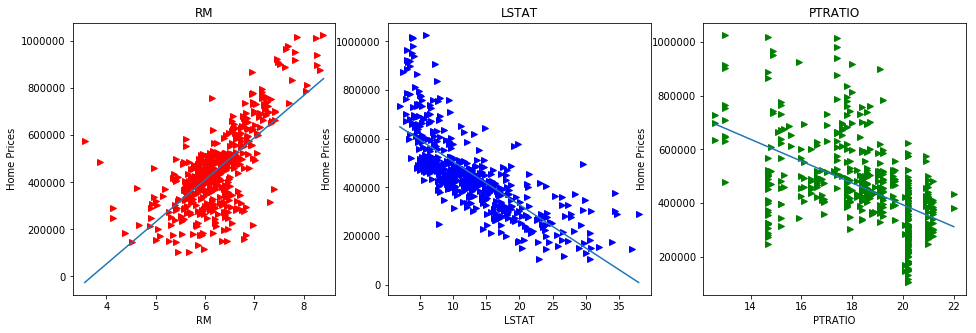

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))

for p, feature_column in enumerate(features.columns):
    # create plots for RM, LSTAT, and PTRATIO vs. prices
    plt.subplot(1, len(features.columns), p+1)
    xf = data[feature_column]
    yp = prices
    if p==1:
        color='b'
    elif p==2:
        color='g'
    else:
        color='r'
    plt.plot(xf, yp, '>', color=color)
    # Regression lines
    plt.plot(np.unique(xf), np.poly1d(np.polyfit(xf, yp, 1))(np.unique(xf)))
    plt.title(feature_column), plt.xlabel(feature_column), plt.ylabel('Home Prices')

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [57]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [58]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** the R^2 value of 0.923 for the regression metric obtained in the previous cell is quite good as it explains 92.3% variation in the data. Need to be further validate with a larger number of data points N (e.g. N>30) to get  statistically significant conclusion about the regression fit.  

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [59]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=777)

#Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** Without setting aside a testing data subset, it is not realistically possible to determine how the trained model would perform for other real data not used for training. The training model could have been overfitted with training data, with potential for poor performance and accuracy when applied to a different dataset.  

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

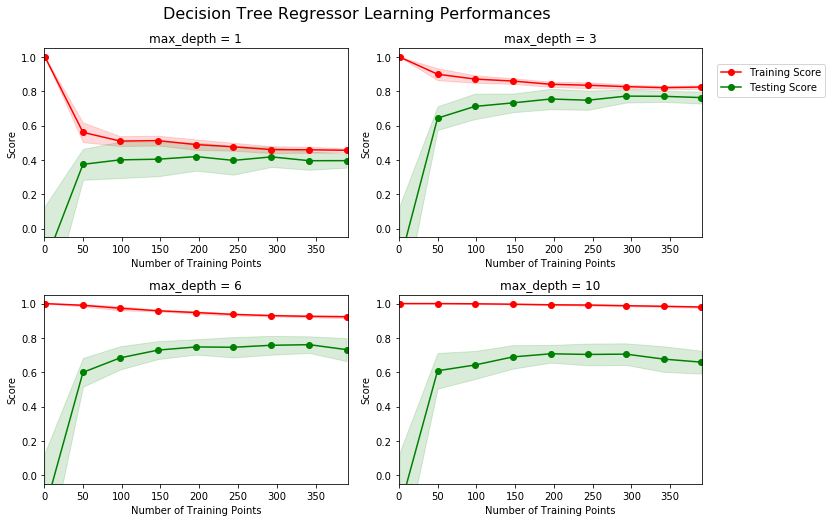

In [60]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer**

The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

* The max_depth=3 plot is chosen for discussion. The training score decreases with number of training points and eventually flattens out to a score of about 0.8. The testing score increases with the number of training points eventually flattening out to a score ~0.8 but remains below the training score.

* Other observations: The asymptotic value of the training score monotonically increases with increasing max_depth value. For testing score the final (asymptotic values) for the flatter portion of the curves increase with max_depth from 1 to 3, then decrease with max_depth from 6 to 10.  

* Having more training points would not make much difference to the model since the plots tend to flattten out with higher values (>300) of the number of training points.
 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

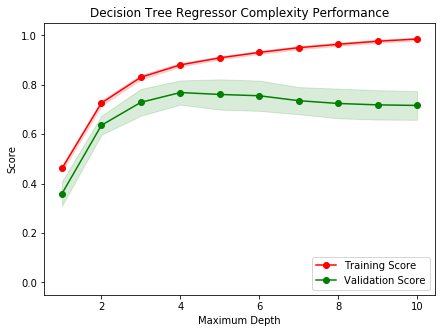

In [61]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
For maximum Depth value of 1, both the training and testing curves are close to each other and have a low Score of about 0.4. The model is suffering from an underfitting problem (High Bias).

For maximum Depth value of 10, the training curve has a much higher score (approaching 1) and testing curve has a lower score of about 0.7, indicating relatively large gap between the scores. The model is suffering from an overfitting problem (High Variance).

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
Maximum depth (MD) value of 4 results in a model that best generalizes to unseen data. 
At this MD value The training score is relatively large (~0.85) and the testing score is also high approaching 0.8. The training and testing scores are reasonabley close at maximum depth of 4 and the differnce in scores starts to increase with MD>4 with potential model overfitting. Maximum depth values less than 4 yield lower training and testing scores, arising from potential model underfitting. 


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Grid search (source:Wikipedia and Scikit-learn documentation)

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.
The same kind of machine learning model could require different constraint, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can best solve the machine learning problem. Usually a metric is chosen to measure the algorithm's performance on an independent data set and hyperparameters that maximize this measure are adopted. A grid search algorithm is usually guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set. *For example, in Scikit-learn one uses cross-validation  to estimate this generalization performance.*

The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.
Since the parameter space of a machine learner may include real-valued or unbounded value spaces for certain parameters, manually set bounds and discretization may be necessary before applying grid search.

*An example of Grid search hyper parameter tuning of an SVM Classifier:*

For example, a typical soft-margin SVM classifier equipped with an RBF kernel has at least two hyperparameters that need to be tuned for good performance on unseen data: a regularization constant C and a kernel hyperparameter γ. Both parameters are continuous, so to perform grid search, one selects a finite set of "reasonable" values for each, say
{C in {10,100,1000}}
{γ in {0.1,0.2,0.5,1.0}}
Grid search then trains an SVM with each pair (C, γ) in the Cartesian product of these two sets and evaluates their performance on a held-out validation set (or by internal cross-validation on the training set, in which case multiple SVMs are trained per pair). Finally, the grid search algorithm outputs the settings that achieved the highest score in the validation procedure.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

*What is the k-fold cross-validation training technique?*

k-fold cross-validation splits data set into k bins, use each bin as testing data and use rest of the data as training data and validate against testing data. Repeat the process k times. And get the average performance. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small. k-fold cross validation especially useful for small dataset since it maximizes both test and training data.

k-fold cross-validation meets the following three requirements:

1. We should train model on large portion of data set. Otherwise we may not capture underlying trends of data sets ehich may lead to underfit and resulting in higher bias.

2. We should use a good ratio of training to testing data points. A low ratio can lead to overfit (variance error) while testing the effectiveness of model.

3. We should iterate on training and testing process multiple times. We should change the train and test data set distribution. This helps to validate the model effectiveness well.


*k-fold cross validation steps:*

* Randomly split the entire dataset into k "folds".
* For each k folds in the dataset, we build our model on k – 1 folds of the data set. Then, test the model to check the effectiveness for kth fold.
* Record the error seen in each of the predictions.
* We Repeat this until each of the k folds has served as the test set.
* We average the k recorded errors (called the cross-validation error) which will serve as our performance metric for the model.
* It is typical to use k=5 to 10.

*What benefit does this technique provide for grid search when optimizing a model?*

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a **risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally.** This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

Grid Search involves systematically working through multiple combinations of parameter tunes, cross validate each and determine which one gives the best performance. We can work through many combination only changing parameters a bit. in scikit-learn  GridSearchCV exhaustively considers all parameter combinations. The fit_model(X,y) function in a cell below in this notebook shows usage of GridSearchCV.

[Aside: On the contrary some studies show that cross-validation is not necessarily appropriate for unsupervised clustering, and during testing may not work very well.]

[Sources: Some materials have been excerpted from scikit-learn 0.18 documentation on Cross validation and GridSearchCV, from Stack Overflow Q & A, and from Analytic Vidhya]

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [62]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn version 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    # cv_sets = ShuffleSplit(X.shape[0], n_splits = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [63]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
Parameter 'max_depth' is 4 for the optimal model.
This result matches my intuitive guess in Question 6: "Maximum depth (MD) value of 4 results in a model that best generalizes to unseen data." 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [64]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $355,320.00
Predicted selling price for Client 2's home: $230,908.70
Predicted selling price for Client 3's home: $927,500.00


**Answer: **
Recommend that the each client sell his/her home at prices ($) below which are also the predicted prices:

    - Predicted selling price for Client 1's home: 355,320.00
    - Predicted selling price for Client 2's home: 230,908.70
    - Predicted selling price for Client 3's home: 927,500.00

* These selling prices are reasonable and follow the trends observed in the Data Exploration section above. Specifically, the plots showed home prices increase with number of rooms (RM) and home prices decrease as the neighborhood poverty levels (LSTAT), or the student-teacher ratio in nearby schools increase.
* For example, among the three homes, Client 2's home has the lowest recommended price because it has lowest RM(4),  highest LSTAT(32 percent), and highest PTRATIO(22-1).
* The reverse is true for Client 3's home which has the highest recommended price because it has highest RM (8),  lowest LSTAT(3 percent), and lowest PTRATIO(12-1).

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [65]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The constructed model should not be used in a real world setting at this time for the following primary and secondary reasons indicated below.

* Primary reasons: 

The housing data is from 1978 about 40 years ago. A lot of factors such as type of construction, demographics, impact of technology on life style and home living, current home prices which have gone up significantly over this period, job market score in and around the location, have changed since then and need to be factored in via features. Additional features such as Location (urban, proximity to parks, lakes, beaches, highway, terrain), Quality of Schools, Neighborhood Crime Index, and Average Distance from Shopping Malls, and Supercenters such as Walmart, Home Depot), and the asking Down Payment as percent of home price, need to be captured.

* Secondary Reasons: 

Potential home buyers also consider the following features for buying decisions: type of kichen (upgraded, island type), roof type and condition, bathrooms (upgraded with modern amenities, yes/no) windows (double pane, yes/no), yard and landscaping, driveway, natural disaster potential (extreme snow, flooding, mud slides, wild fire on hills), etc.

Real estate value estimating sites: like zillow.com and homes.com use various featutures and models. A good discussion  is available at 5:00 minutes into this video: See video at 5:00: https://www.youtube.com/watch?v=qdF4yD9FBAU&feature=youtu.be

*Is the model robust enough to make consistent predictions?*

See robustness of decision tree discussion here: https://en.wikipedia.org/wiki/Decision_tree_learning

Limitations:
Decision Trees do not tend to be as accurate as other approaches.
Decision Trees can be very non-robust. A small change in the training data can result in a big change in the tree, and thus a big change in final predictions.

k Nearest Neighbor (kNN) model also appears to be a reasonable model candidate along with time-series data modeling for home price predictions because values oh homes in the neighborhood provide a general price range per sq ft.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.